True
My program took 0.28158998489379883 to run


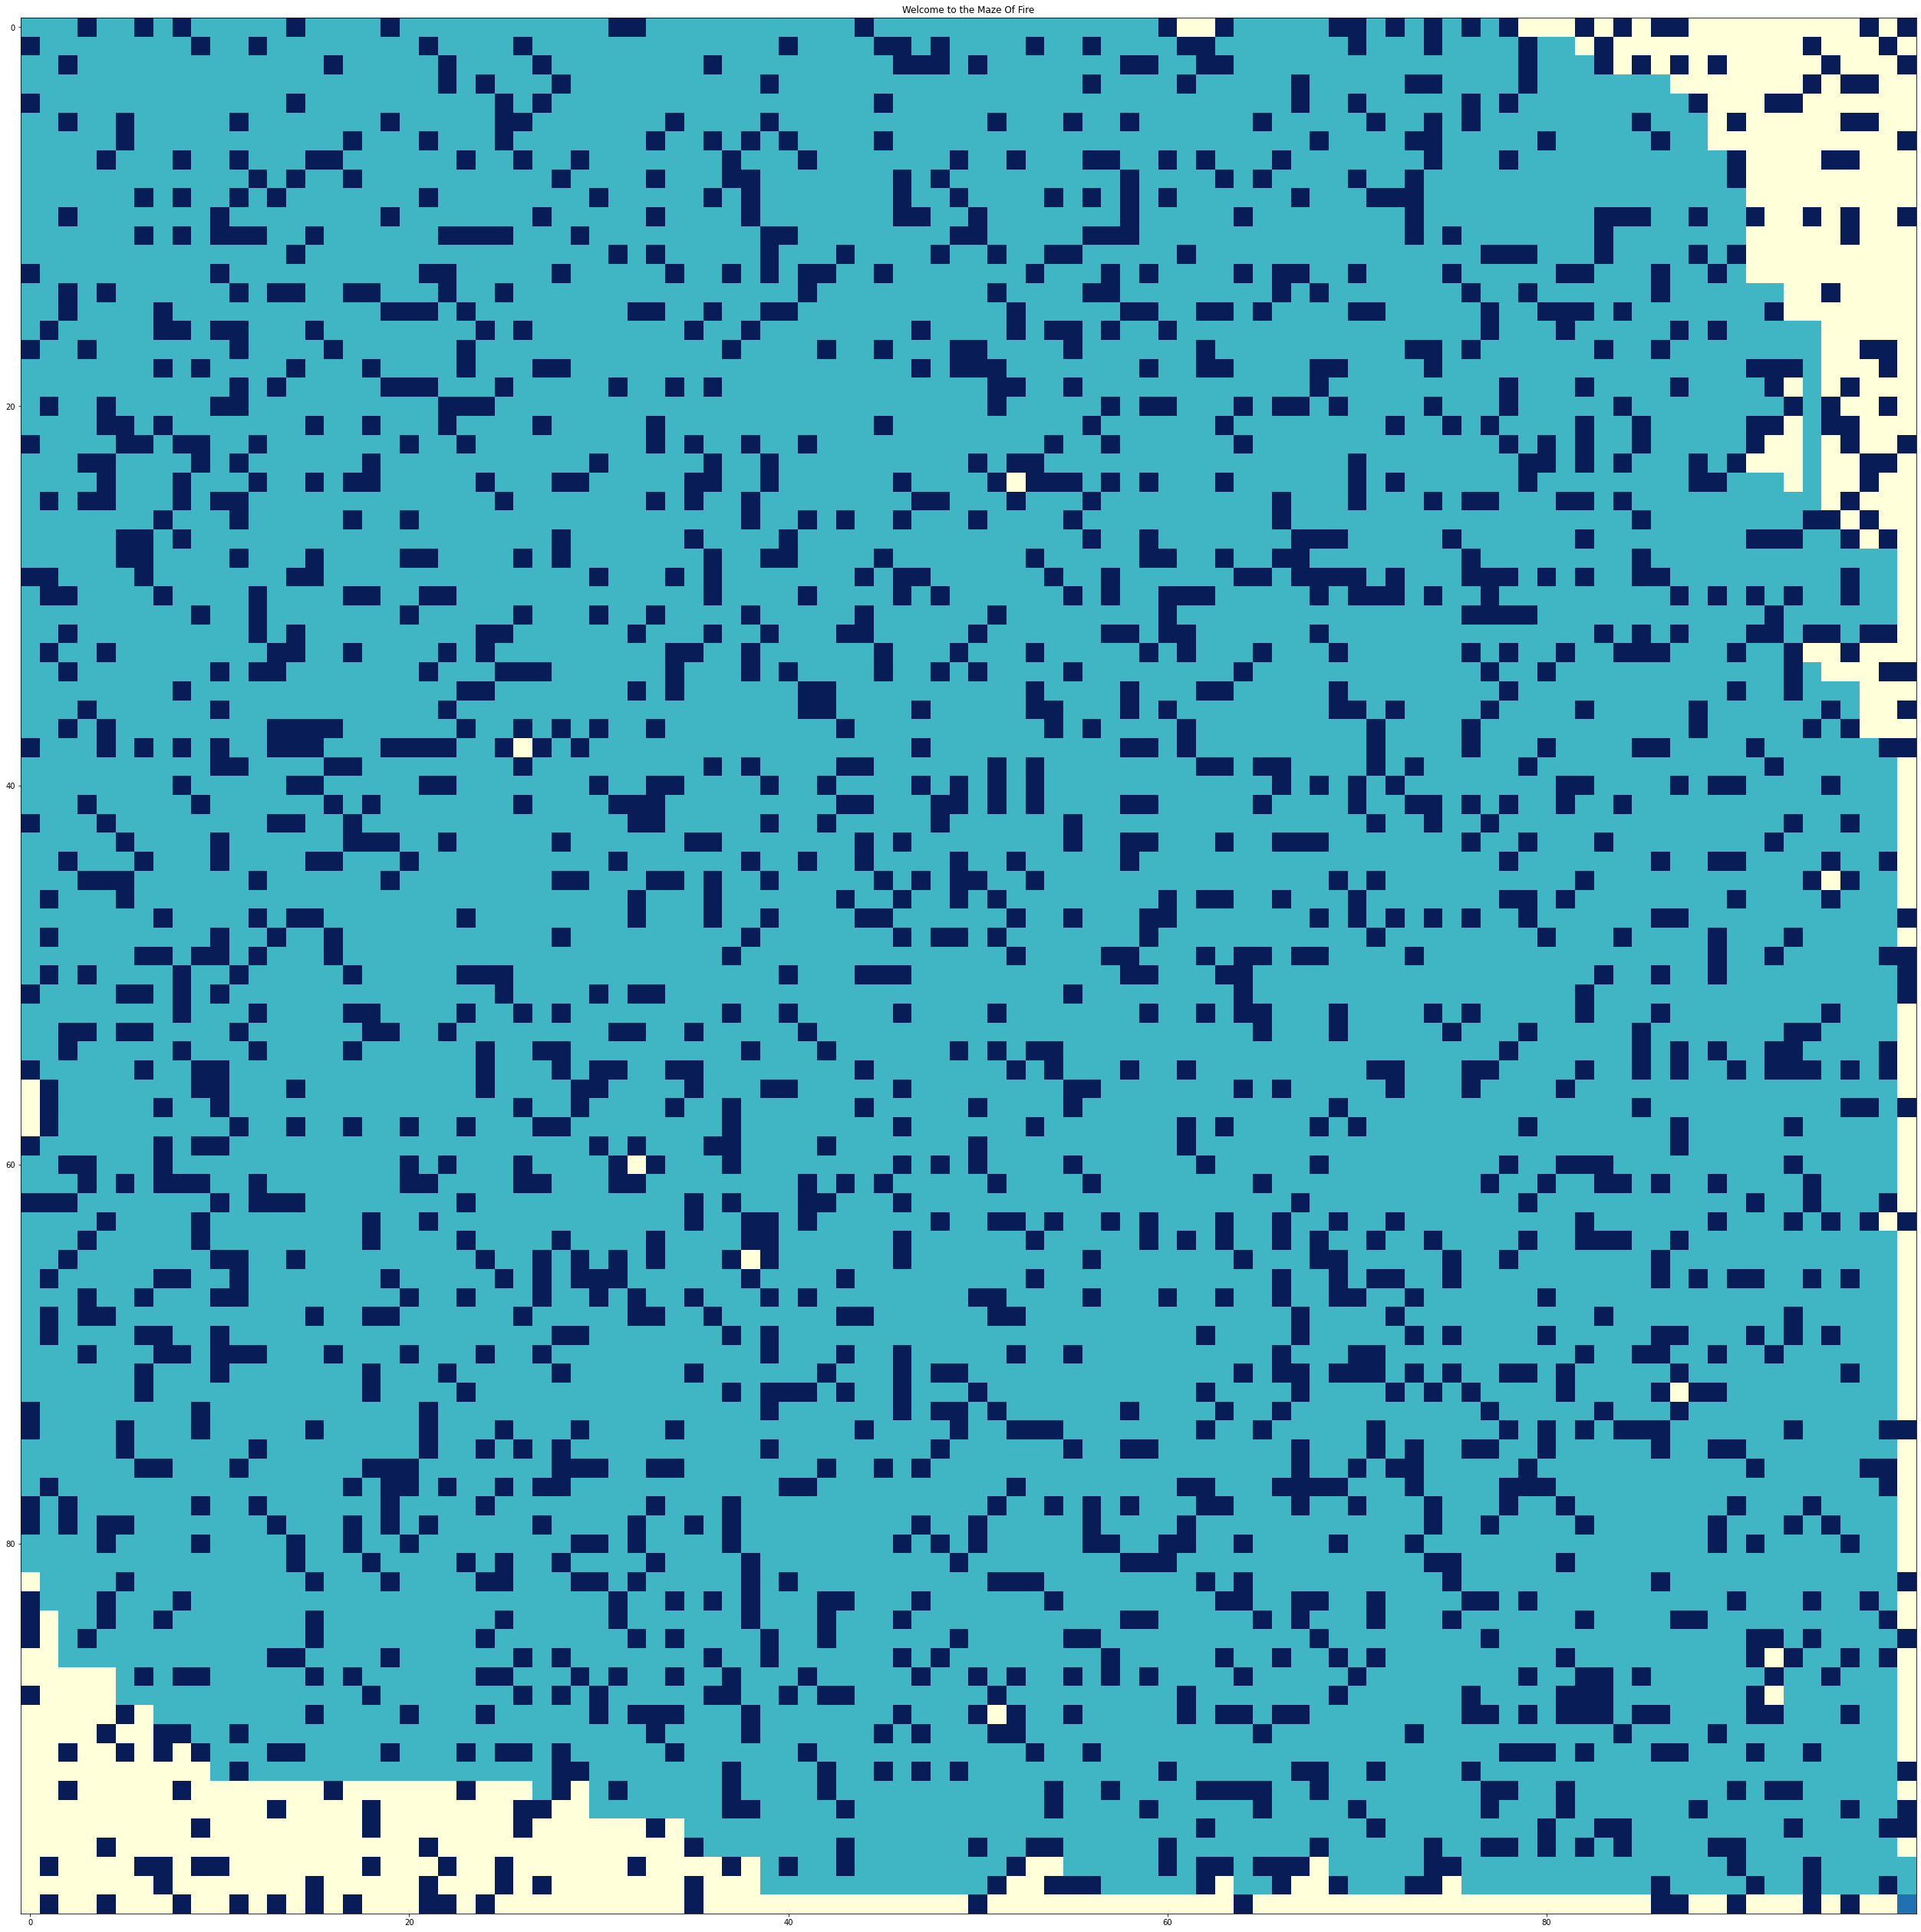

In [1]:
import matplotlib.pyplot as plt
from collections import deque
import random
import time
from queue import PriorityQueue
import numpy as np
from numpy.linalg import norm
start_time = time.time()

dim = 100 #Dimensions of the maze
p = 0.2 #Probability of cell being occupied

OBSTACLE_VALUE = 1
START_AND_END_POINT_VALUE = 0.2
A_STAR_VISITED_VALUE = 0.5
END_POINT_VALUE = 0.7

#Generating Maze by inputting values randomly
def maze_generator(dim, p):
    maze = []
    for i in range(dim):
        maze.append([])
        for j in range(dim):
            value = random.random() <= p # can either be 0 or 1
            maze[i].append(value)
    maze[0][0] = START_AND_END_POINT_VALUE #Start Point
    maze[-1][-1] = START_AND_END_POINT_VALUE # End Point
    return maze

#Initializes the maze with randomized values
maze = maze_generator(dim,p)

def a_star(start, goal):
    # generate priority queue for a star
    fringe = PriorityQueue()
    closed_set = []
    # add  starting coordinates to queue with heuristics
    fringe.put(start)
    while not fringe.empty():
        current = fringe.get()
        # There is a valid path to the goal
        if current[3] == goal[3]:
            maze[-1][-1] = END_POINT_VALUE
            return True
        else:
            if maze[current[3][0]][current[3][1]] != A_STAR_VISITED_VALUE:
                # all neighboring coordinate are added to fringe and heuristic is calculated for every neighbor
                generate_valid_children_A(current, fringe, start, goal)
                maze[current[3][0]][current[3][1]] = A_STAR_VISITED_VALUE
                closed_set.append(current[3])
    return False

def generate_valid_children_A(current, fringe, start, goal):
    row_direction = [-1, 1, 0, 0] #(north, south, east, west) {check the row above, check the row below, 0, 0}
    col_direction = [0, 0, 1, -1] # {0, 0, Check the column to the right, check the column to the left}
    current[2] = current[2] + 1
    for i in range(0,4): # loop through every possible coordinate
        row = current[3][0] + row_direction[i]
        col = current[3][1] + col_direction[i]

        if row in range(0, dim): # if the row coordinate is out of bounds, it cannot be added to the fringe
            if(col in range(0,dim)): # if the col coordinate is out of bounds, it cannot be added to the fringe
                if(maze[row][col] != OBSTACLE_VALUE): # Check if the (row, col) coordinate is a obstacle
                    if(maze[row][col] != A_STAR_VISITED_VALUE):
                        g = current[2] # exact distance from current to start
                        #g = euclidean_distance_A(row, col, start) # distance from current to start
                        h = euclidean_distance_A(row, col, goal) #distance from current to goal
                        total = g+h # the total heuristic
                        #print(row, col)
                        #print(ed)
                        fringe.put([total, h, g, (row, col)]) 


def euclidean_distance_A(row, col, coor):
    # calculates the euclidean distance between two vectors
    a = np.array([row, col])
    b = np.array([coor[3][0], coor[3][1]])

    #sqrt(cols^2 + rows^2)
    return norm(a-b)




start_A = [0,0,0, (0,0)] # [total, h, g, (coordinates)]
goal_A = [0,0,0, (dim-1,dim-1)]
print(a_star(start_A, goal_A))

#creating the size of the figure as well as the size of each individual square in the grid
Grid = plt.figure(figsize=(dim,dim)).add_subplot(224) 
Grid.set_title('Welcome to the Maze Of Fire')

#Display the data as an image
Image = plt.imshow(maze)

#Colormap of the generated grid ranging from yellow to blue
#Yellow equals free space (0)
#Dark Blue equals unavailable Space(1)
Image.set_cmap('YlGnBu')

print("My program took", time.time() - start_time, "to run")